# Segundo ejercicio
En este segundo ejercicio, se propone realizar un análisis exploratario algo más complejo sobre el conjunto de datos de Gapminder.


In [3]:
# Importo las librerías básicas:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

df_train =pd.read_csv('C:/Users/U000000/Desktop/EstadDescUCM/MaterialApoyo/gapminder.csv') 
df_train.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [4]:
# Echo un vistazo las columnas:

df_train.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

La variable 'gdpPercap' es la variable objetivo de este conjunto de datos. En pasos posteriores a este análisis exploratorio de datos se realizaría una predicción del valor de esta variable, por lo que voy a estudiarla con mayor detenimiento

In [5]:
df_train['gdpPercap'].describe()

count      1704.000000
mean       7215.327081
std        9857.454543
min         241.165876
25%        1202.060309
50%        3531.846988
75%        9325.462346
max      113523.132900
Name: gdpPercap, dtype: float64

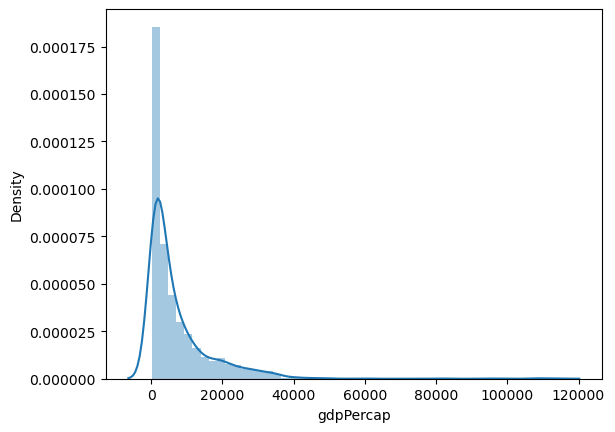

In [6]:
# Histograma:

sns.distplot(df_train['gdpPercap']);

A simple vista se pueden apreciar:

    Una desviación con respecto a la distribución normal.
    Una asimetría positiva.
    Algunos picos.



In [8]:
# Asimetría y curtosis:

print("Skewness: %f" % df_train['gdpPercap'].skew())
print("Kurtosis: %f" % df_train['gdpPercap'].kurt())

Skewness: 3.850272
Kurtosis: 27.515894


Relación con variables numéricas

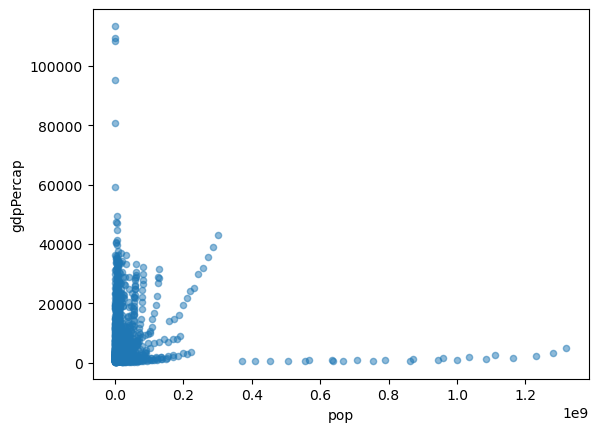

In [9]:
# Diagrama de dispersión pop/gdpPercap:

var = 'pop'
data = pd.concat([df_train['gdpPercap'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='gdpPercap', alpha = 0.5);

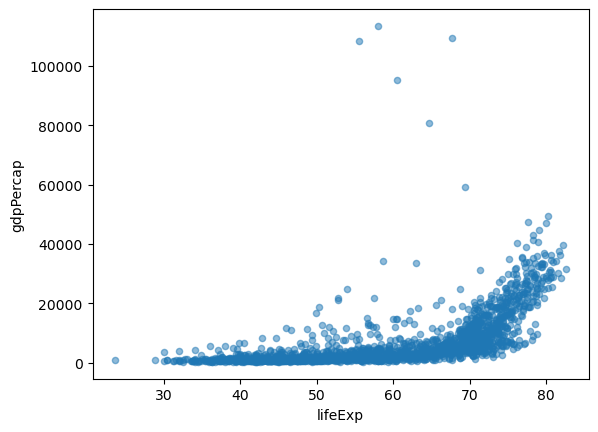

In [10]:


# Diagrama de dispersión lifeExp/gdpPercap:

var = 'lifeExp'
data = pd.concat([df_train['gdpPercap'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='gdpPercap', alpha = 0.5);



Relación con variables categóricas


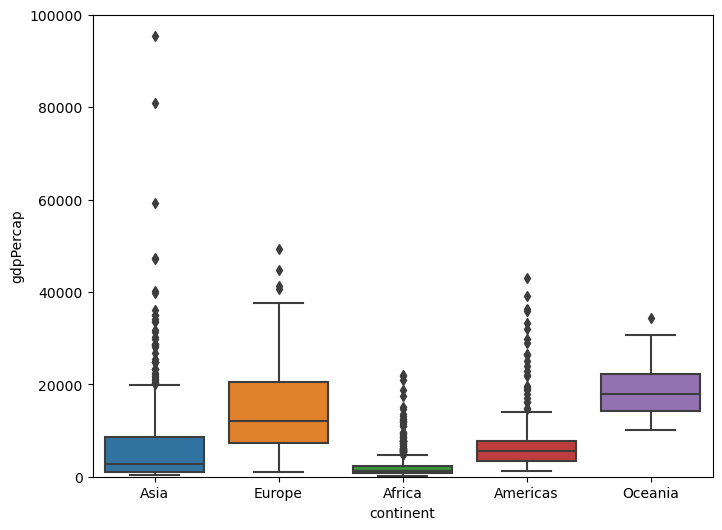

In [12]:
# Diagrama de cajas continent/gdpPercap:

var = 'continent'
data = pd.concat([df_train['gdpPercap'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="gdpPercap", data=data)
fig.axis(ymin=0, ymax=100000);

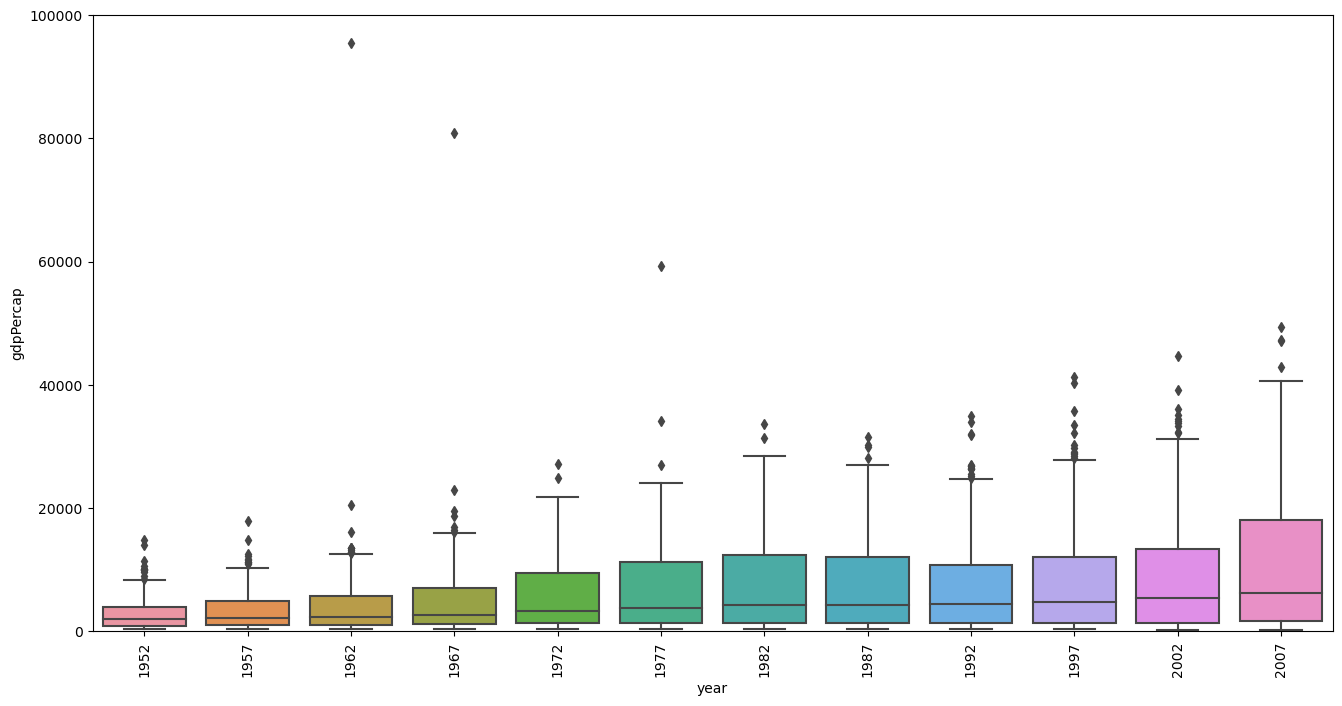

In [15]:
var = 'year'
data = pd.concat([df_train['gdpPercap'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="gdpPercap", data=data)
fig.axis(ymin=0, ymax=100000);
plt.xticks(rotation=90);


Resumiendo:

    'lifeExp' mantiene una relación lineal positiva con 'gdpPercap', aumentando en el mismo sentido. En el caso de 'pop', la pendiente de esta relación no es muy determinante.
    'continent' y 'year' también parecen relacionadas con 'gdpPercap', tal y como se puede observar en los diagramas de cajas.

Sólo he explorado cuatro variables, pero hay muchas otras a analizar.


## Análisis multivariable
Hasta ahora sólo me he dejado llevar por la intuición para el análisis de las variables que he creído importantes. Es hora de un análisis más objetivo.

Para ello voy a realizar las siguientes pruebas de correlación:

    Matriz de correlación general.
    Matriz de correlación centrada en la variable 'SalePrice'.
    Diagramas de dispersión entre las variables más correladas.


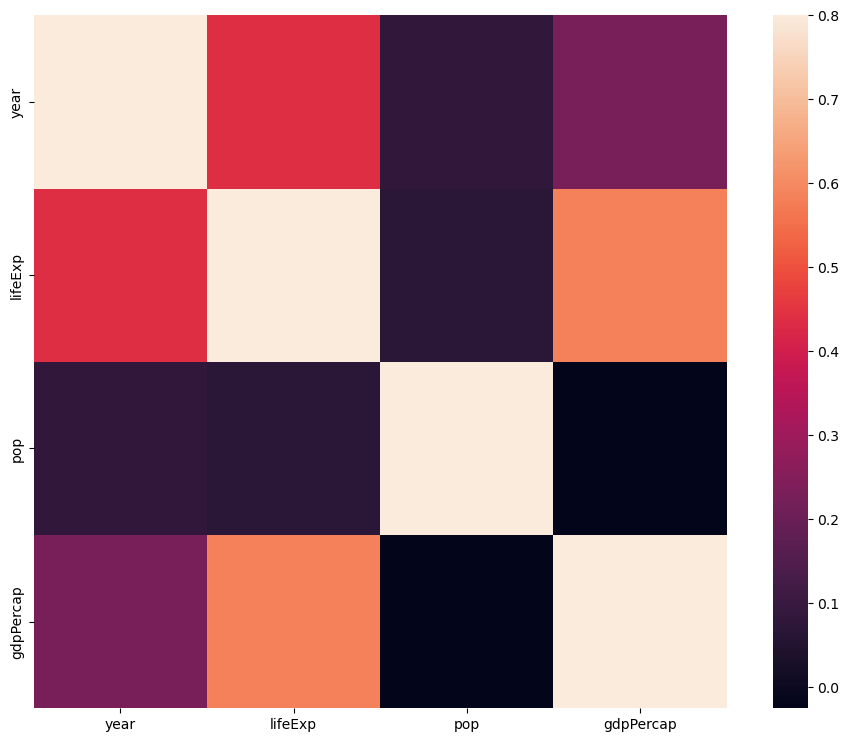

In [16]:
# Matriz de correlación:

corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [39]:
# o también como vimos en el primer tutorial
corrmat.style.background_gradient (cmap = 'coolwarm')

,year,lifeExp,pop,gdpPercap
year,1.000000,0.435611,0.082308,0.227318
lifeExp,0.435611,1.000000,0.064955,0.583706
pop,0.082308,0.064955,1.000000,-0.025600
gdpPercap,0.227318,0.583706,-0.025600,1.000000


El mapa de calor es una forma visual muy útil para para conocer las variables y sus relaciones. A primera vista hay dos variables que llaman la atención: 'lifeExp' y 'year'. En ambos casos parece haber una correlación significativa.

Con respecto a las correlaciones de la variable 'gdpPercap', destacan las vistas anteriormente ('lifeExp', 'year' y 'OverallQual'), pero hay otras que también deberían ser tenidas en cuenta.


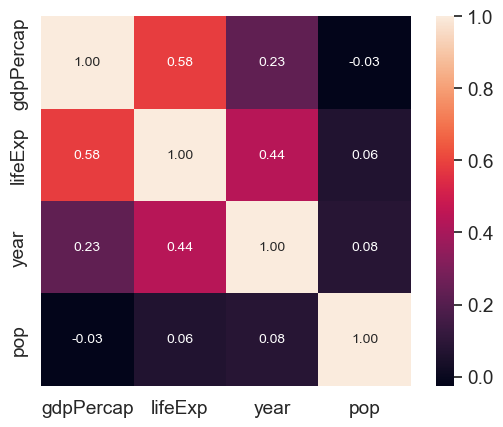

In [17]:
# Matriz de correlación
k = 10 # Número de variables.
cols = corrmat.nlargest(k, 'gdpPercap')['gdpPercap'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [18]:
corr = df_train.corr()
corr[['gdpPercap']].sort_values(by = 'gdpPercap',ascending = False).style.background_gradient()

,gdpPercap
gdpPercap,1.000000
lifeExp,0.583706
year,0.227318
pop,-0.025600


En estas matrices de correlación se puede confirmar lo indicado anteriormente. A continuación, se extraen los Diagramas de dispersión entre 'gdpPercap' y sus variables correladas

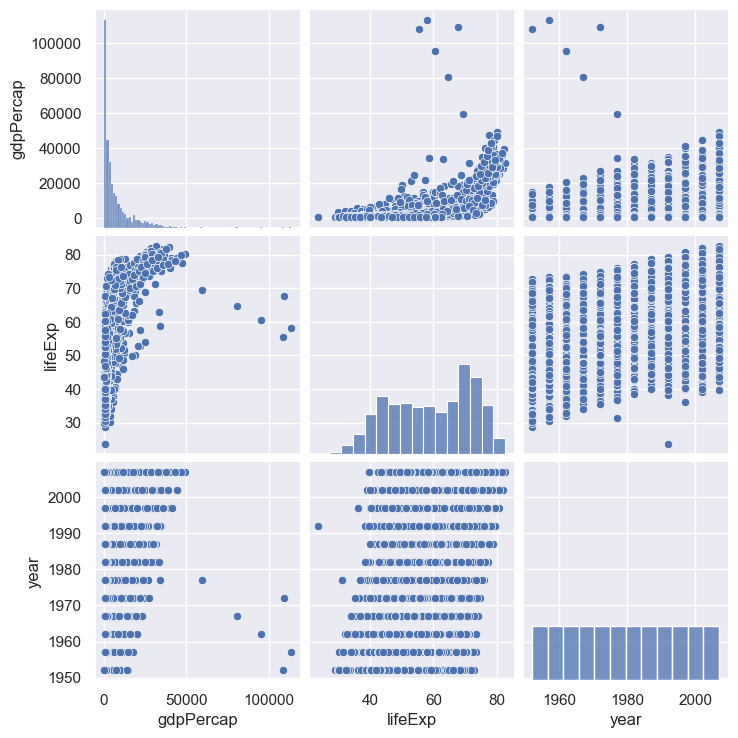

In [19]:
# Scatter plot:

sns.set()
cols = ['gdpPercap', 'lifeExp', 'year']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

Limpieza de datos


In [20]:
# Missing data:

total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
country,0,0.0
continent,0,0.0
year,0,0.0
lifeExp,0,0.0
pop,0,0.0
gdpPercap,0,0.0


Se observa que no hay missing. 

Los datos atípicos u outliers pueden afectar marcadamente el modelo, además de suponer una fuente de información en sí misma. Su tratamiento es un asunto complejo que requiere más atención; por ahora sólo voy a hacer un análisis rápido a través de la desviación estándar de la variable 'gdpPercap' y a realizar un par de diagramas de dispersión.

Análisis univariable

La primera tarea en este caso es establecer un umbral que defina una observación como valor atípico. Para ello voy a estandarizar los datos, es decir, transformar los valores datos para que tengan una media de 0 y una desviación estándar de 1.



In [23]:
# Estandarización de datos:

gdpPercap_scaled = StandardScaler().fit_transform(df_train['gdpPercap'][:,np.newaxis]);
low_range = gdpPercap_scaled[gdpPercap_scaled[:,0].argsort()][:10]
high_range = gdpPercap_scaled[gdpPercap_scaled[:,0].argsort()][-10:]
print('Fuera de la distribución (por debajo):')
print(low_range)
print('\nFuera de la distribución (por arriba):')
print(high_range)

Fuera de la distribución (por debajo):
[[-0.70770892]
 [-0.70401662]
 [-0.70185576]
 [-0.70175387]
 [-0.70050185]
 [-0.69880191]
 [-0.69859293]
 [-0.69808584]
 [-0.69775104]
 [-0.69725731]]

Fuera de la distribución (por arriba):
[[ 3.80216284]
 [ 4.05171269]
 [ 4.06833546]
 [ 4.27638128]
 [ 5.2818331 ]
 [ 7.47669543]
 [ 8.95451138]
 [10.26600971]
 [10.36398607]
 [10.78767472]]


Los valores bajos son similares y no muy alejados del 0.
Los valores altos están muy alejados del 0. Los valores superiores a 7 están realmente fuera de rango.

Análisis bivariable


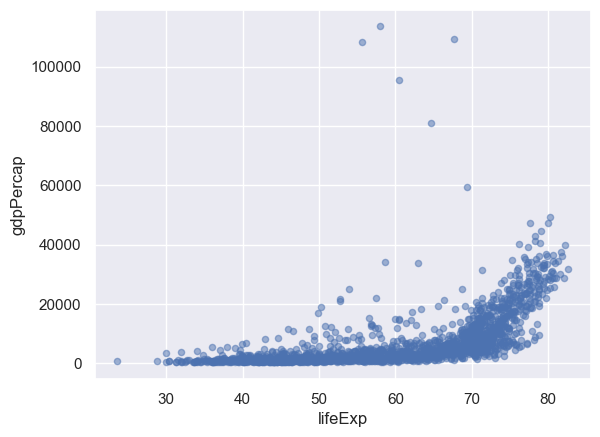

In [24]:
# Análisis bivariable gdpPercap/lifeExp:

var = 'lifeExp'
data = pd.concat([df_train['gdpPercap'], df_train[var]], axis = 1)
data.plot.scatter(x = var, y = 'gdpPercap', alpha = 0.5);



Este diagrama de dispersión muestra un par de cosas interesantes:

 Los  valores más altos de la variable 'lifeExp' resultan extraños.
    Las observaciones más altas de la variable 'gdpPercap' se corresponden con las que observamos en el análisis univariable anterior. Son casos especiales, pero parece que siguen la tendencia general, por lo que voy a mantenerlas.



In [26]:
# Eliminación de valores:

df_train.sort_values(by = 'gdpPercap', ascending = False)[:10]
#df_train = df_train.drop(df_train[df_train['Id'] == 853].index)
#df_train = df_train.drop(df_train[df_train['Id'] == 856].index)

,country,continent,year,lifeExp,pop,gdpPercap
853,Kuwait,Asia,1957,58.033,212846,113523.13290
856,Kuwait,Asia,1972,67.712,841934,109347.86700
852,Kuwait,Asia,1952,55.565,160000,108382.35290
854,Kuwait,Asia,1962,60.470,358266,95458.11176
855,Kuwait,Asia,1967,64.624,575003,80894.88326
857,Kuwait,Asia,1977,69.343,1140357,59265.47714
1151,Norway,Europe,2007,80.196,4627926,49357.19017
863,Kuwait,Asia,2007,77.588,2505559,47306.98978
1367,Singapore,Asia,2007,79.972,4553009,47143.17964
1150,Norway,Europe,2002,79.050,4535591,44683.97525


## Comprobación de normalidad

Ya hemos realizado cierta limpieza de datos y estudiado la variable 'gdpPercap'. Ahora voy a comprobar si 'gdpPercap' cumple las asunciones estadísticas que nos permiten aplicar las técnicas del análisis multivariable.
De acuerdo con Hair et al. (2013), hay que comprobar cuatro suposiciones fundamentales:

Normalidad - Cuando hablamos de normalidad lo que queremos decir es que los datos deben parecerse a una distribución normal. Es importante porque varias pruebas estadísticas se basan en esta suposición. Sólo voy a comprobar la normalidad de la variable 'gdpPercap', aunque resulte un tanto limitado ya que no asegura la normalidad multivariable. Además, si resolvemos la normalidad evitamos otros problemas, como la homocedasticidad.

Homocedasticidad - La homocedasticidad se refiere a la suposición de que las variables dependientes tienen el mismo nivel de varianza en todo el rango de las variables predictoras, según (Hair et al., 2013). La homocedasticidad es deseable porque queremos que el término de error sea el mismo en todos los valores de las variables independientes.

Linealidad- La forma más común de evaluar la linealidad es examinar los diagramas de dispersión y buscar patrones lineales. Si los patrones no son lineales, valdría la pena explorar las transformaciones de datos. Sin embargo, no voy a entrar en esto porque la mayoría de los gráficos de dispersión que hemos visto parecen tener relaciones lineales.

Ausencia de errores correlacionados - Esto ocurre a menudo en series temporales, donde algunos patrones están relacionados en el tiempo. Tampoco voy a tocar este asunto.


En búsqueda de la normalidad

El objetivo es estudiar la variable 'gdpPercap' de forma fácil, comprobando:

Histograma - Curtosis y asimetría.
Gráfica de probabilidad normal - La distribución de los datos debe ajustarse a la diagonal que representa la distribución normal.




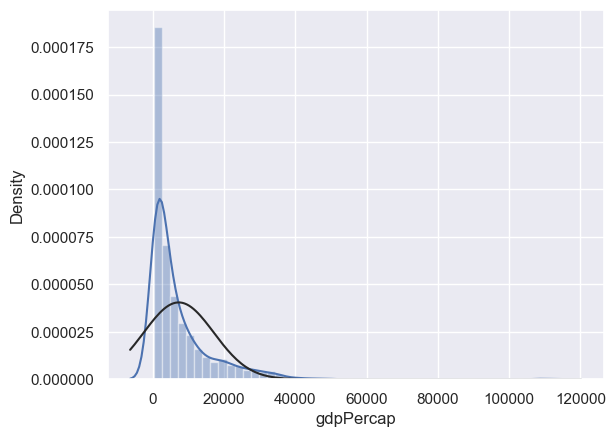

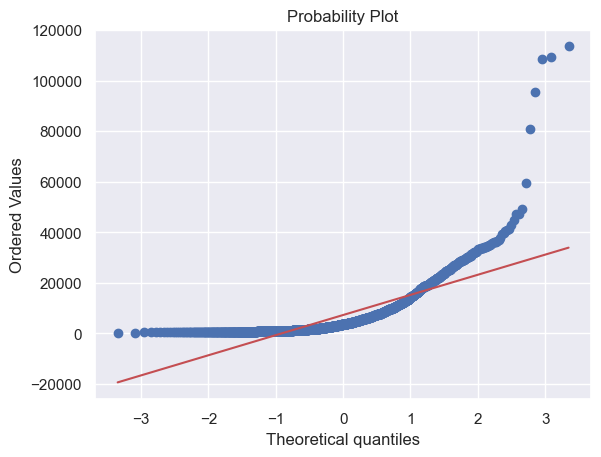

In [27]:
# Histograma y gráfico de probabilidad normal:

sns.distplot(df_train['gdpPercap'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['gdpPercap'], plot = plt)



De estos gráficos se desprende que 'gdpPercap' no conforma una distribución normal. Muestra picos, asimetría y no sigue la línea diagonal; aunque una simple transformación de datos puede resolver el problema.


In [28]:


# Transformación de los datos:

df_train['gdpPercap'] = np.log(df_train['gdpPercap'])



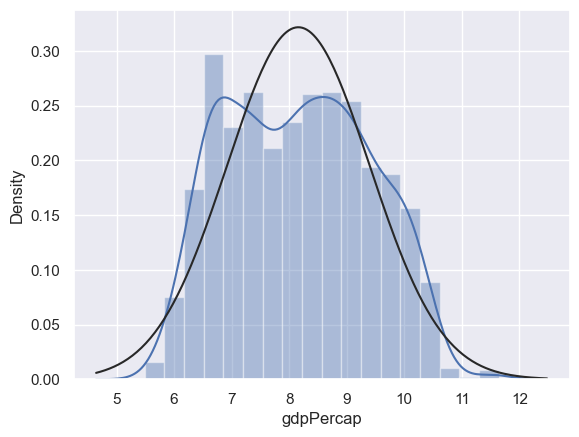

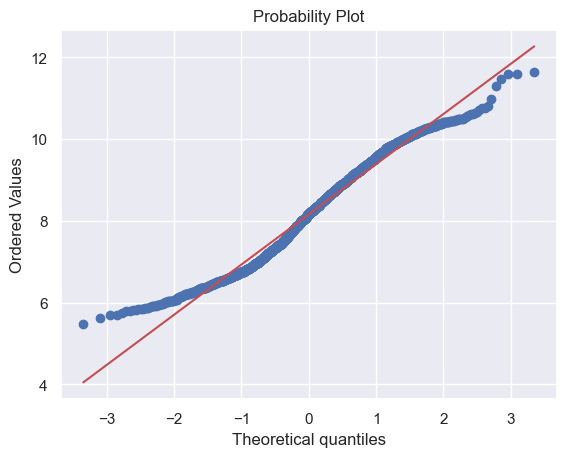

In [29]:
# Histograma y gráfico de probabilidad normal sobre los datos transformados:

sns.distplot(df_train['gdpPercap'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['gdpPercap'], plot = plt)



Terminado el trabajo con 'gdpPercap', voy a seguir con 'lifeExp'.


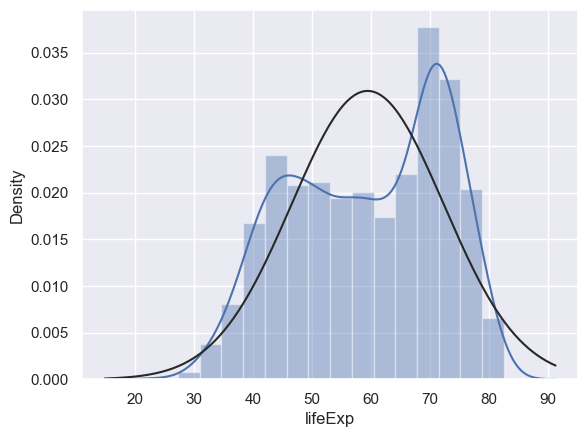

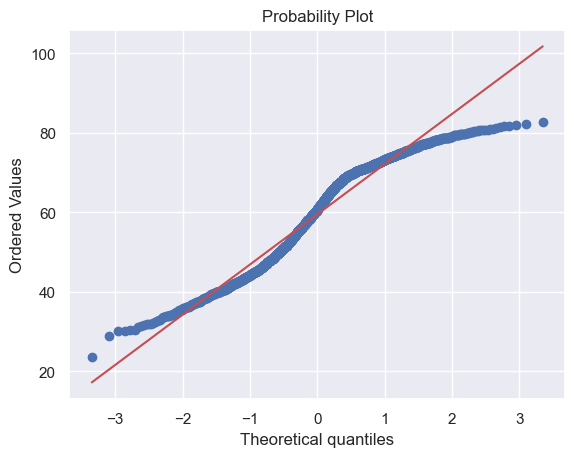

In [30]:
# Histograma y gráfico de probabilidad normal:

sns.distplot(df_train['lifeExp'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['lifeExp'], plot = plt)

In [31]:


# Transformación de datos:

df_train['lifeExp'] = np.log(df_train['lifeExp'])



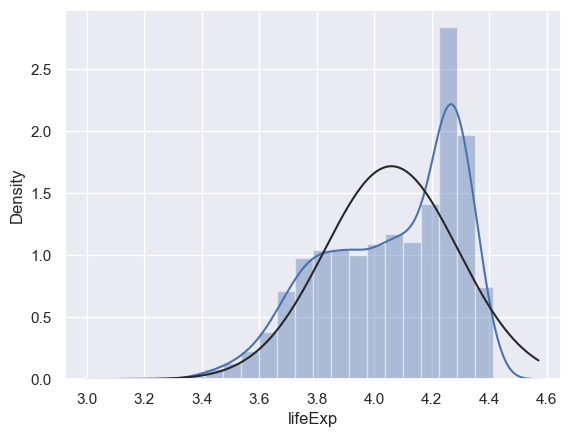

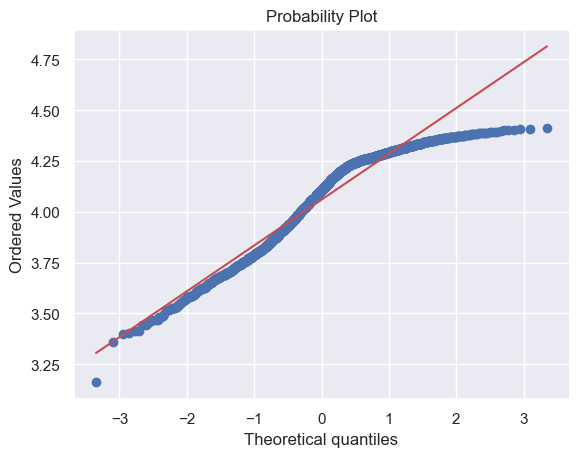

In [32]:
# Histograma y gráfico de probabilidad normal sobre los datos transformados:

sns.distplot(df_train['lifeExp'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_train['lifeExp'], plot = plt)



Estos gráficos nos muestran que la variable 'lifeExp': Presenta asimetrías.
Para aplicar una transformación logarítmica, se podría crear bins.

En búsqueda de la homocedasticidad

El mejor método para probar la homocedasticidad para dos variables métricas es de forma gráfica. Las desviaciones de una dispersión uniforme se muestran mediante formas tales como conos (pequeña dispersión a un lado del gráfico, gran dispersión en el lado opuesto) o diamantes (un gran número de puntos en el centro de la distribución).

Empiezo por 'gdpPercap' y 'lifeExp'.

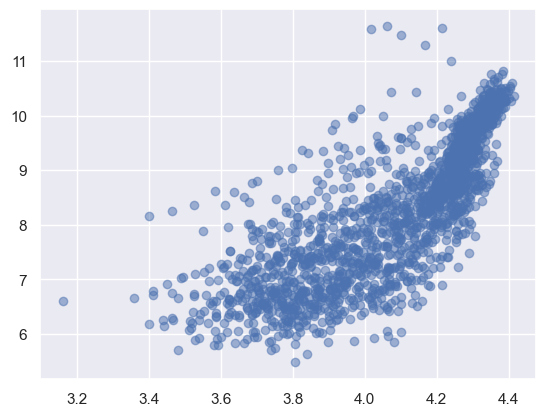

In [33]:


# Gráfico de dispersión:

plt.scatter(df_train['lifeExp'], df_train['gdpPercap'], alpha = 0.5);

A continuación, utilizando seaborn, generar un gráfico de dispersión que muestre la relación entre la población y la esperanza de vida e incluye una recta de mejor ajuste.
Después, lo mismo pero transformando logarítmicamente la variable de población.

<Axes: xlabel='pop', ylabel='lifeExp'>

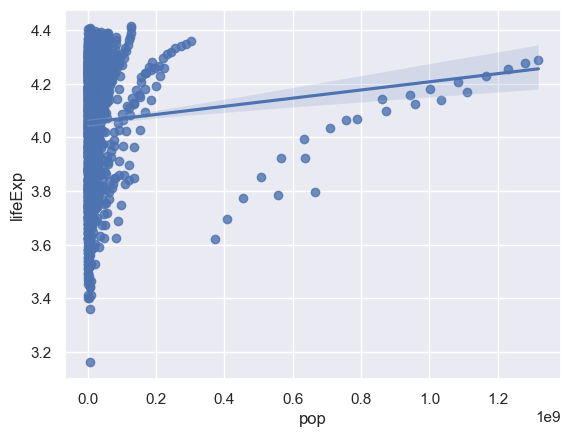

In [35]:
import seaborn as sns

sns.regplot(x = "pop", y = "lifeExp", data = df_train)


<Axes: xlabel='pop', ylabel='lifeExp'>

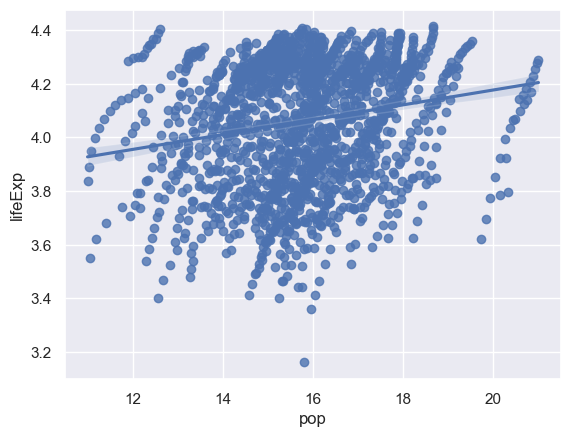

In [37]:
sns.regplot(x = np.log(df_train['pop']), y = "lifeExp", data = df_train)